## NuSVC
### Nu-Support Vector Classification.
- Similar to SVC but uses a parameter to control the number of support vectors.
- The implementation is based on libsvm.

### IMPORT IRIS DATASET

In [4]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

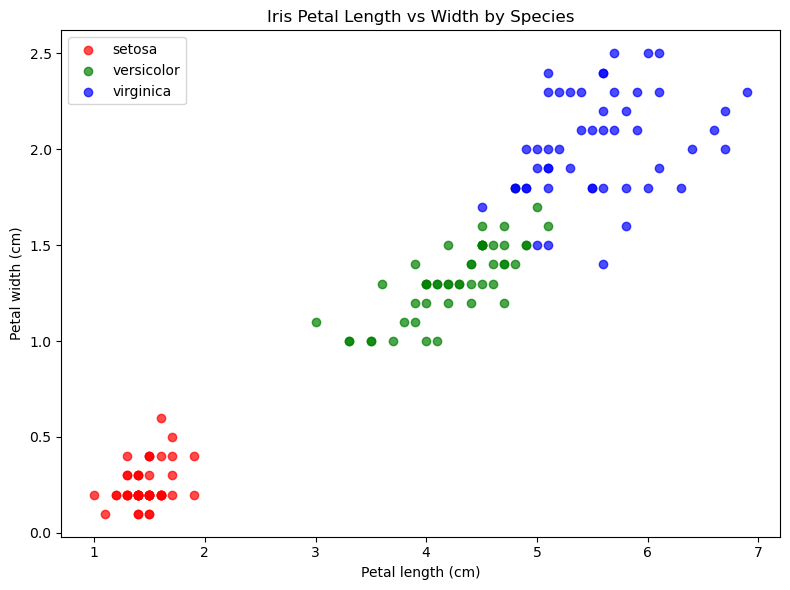

In [22]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species_name'] = iris.target
df['species_name'] = df['species_name'].map(species_map)

plt.figure(figsize=(8, 6))
for species, color in zip(species_map.values(), ['red', 'green', 'blue']):
    subset = df[df['species_name'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                label=species, alpha=0.7, color=color)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris Petal Length vs Width by Species')
plt.legend()
plt.tight_layout()
plt.show()

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
model = make_pipeline(NuSVC(nu=0.5, kernel='rbf', gamma='scale'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precisión: {precision * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Reporte de clasificación: \n{classification_report(y_test, y_pred, zero_division=0)}")

Accuracy: 100.00%
Precisión: 100.00%
F1-score: 100.00%
Recall: 100.00%
Reporte de clasificación: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



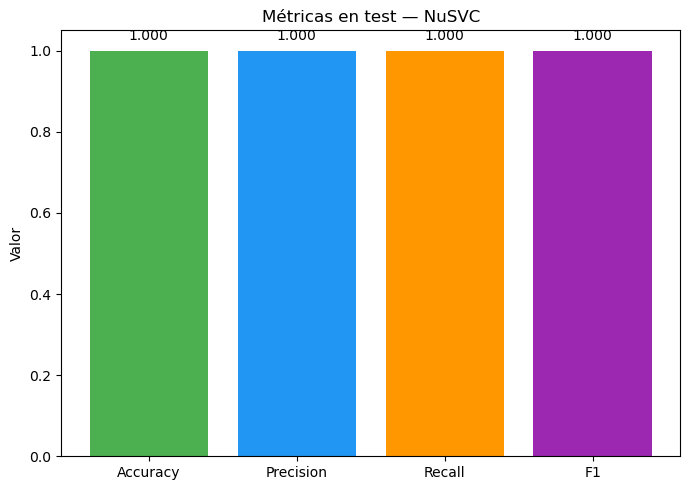

In [17]:
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals, color=["#4caf50", "#2196f3", "#ff9800", "#9c27b0"])
plt.ylim(0, 1.05)
plt.title("Métricas en test — NuSVC")
plt.ylabel("Valor")
for rect, val in zip(bars, metric_vals):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

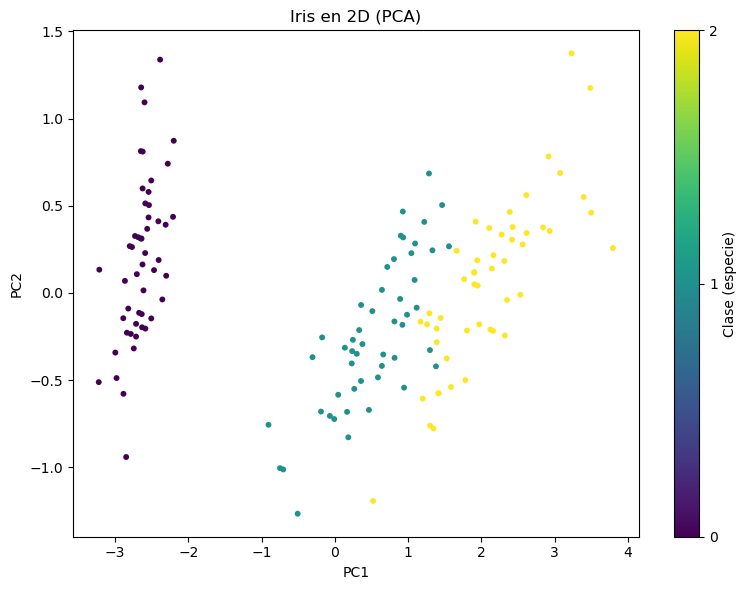

In [24]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", s=18, edgecolor="none")
plt.title("Iris en 2D (PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(3))
cbar.set_label("Clase (especie)")
plt.tight_layout()
plt.show()

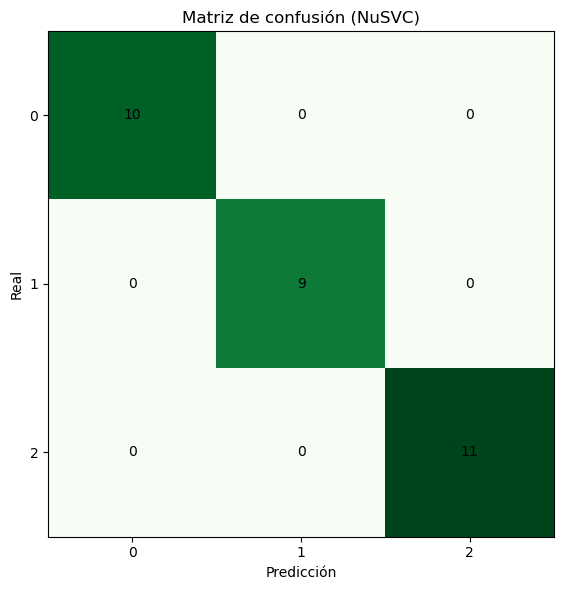

In [20]:
plt.figure(figsize=(7,6))
plt.imshow(cm, cmap="Greens", interpolation="nearest")
plt.title("Matriz de confusión (NuSVC)")
plt.xticks(ticks=range(3), labels=range(3))
plt.yticks(ticks=range(3), labels=range(3))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

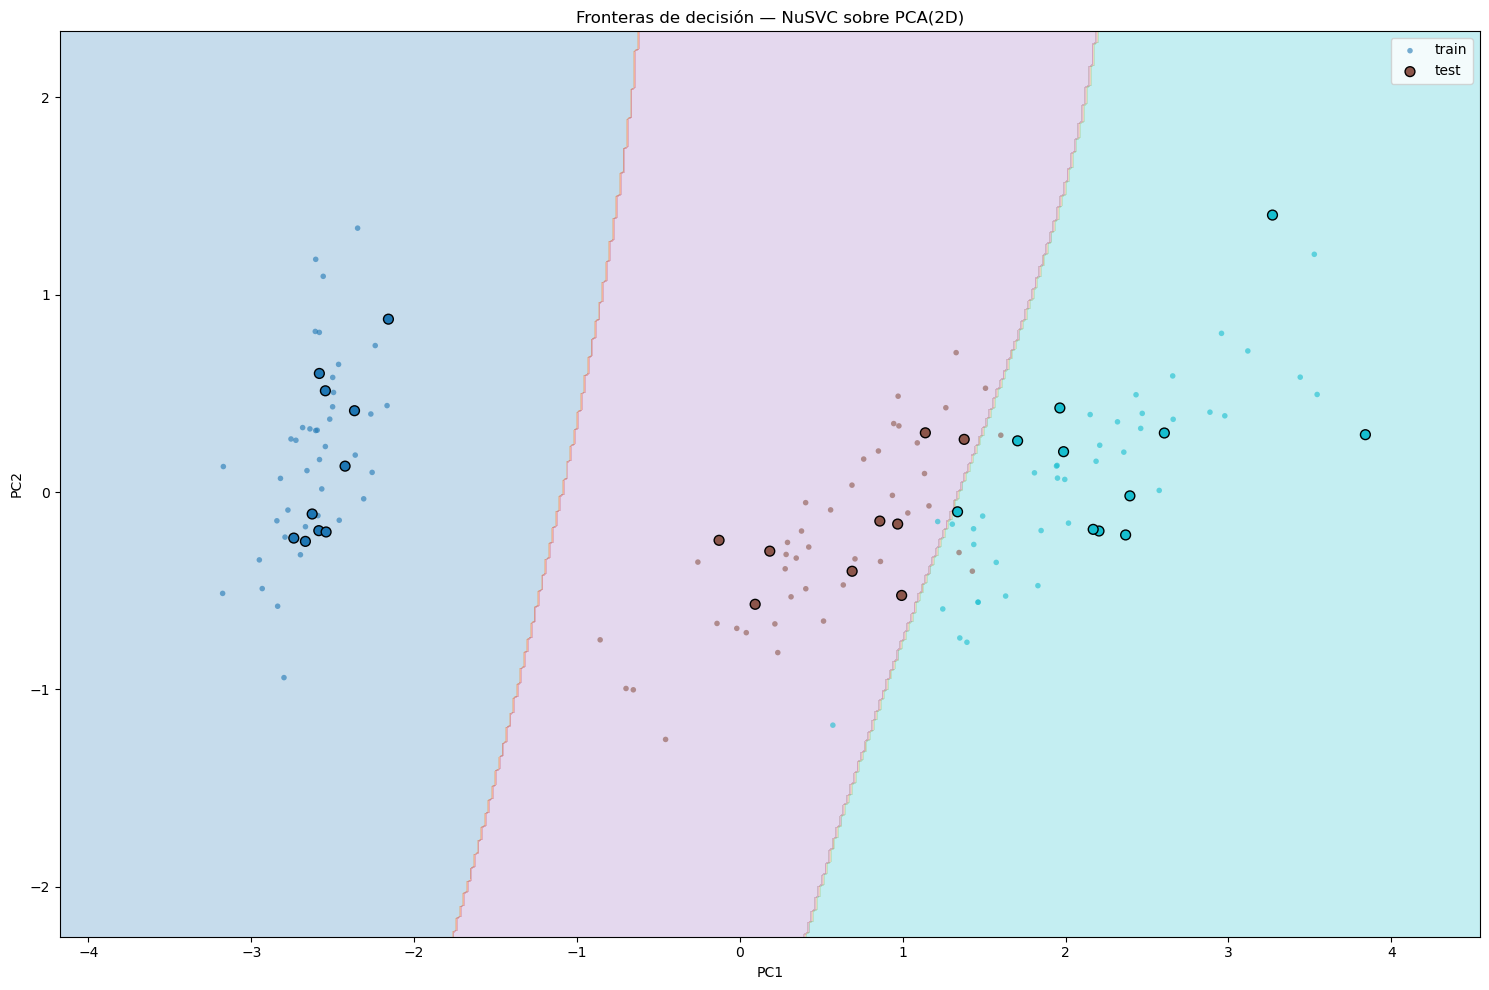

In [21]:
pca2 = PCA(n_components=2, random_state=42)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca  = pca2.transform(X_test)

NuSVC2 = NuSVC(nu=0.5, kernel='rbf', gamma='scale')
NuSVC2.fit(X_train_pca, y_train)

# malla en el plano PCA
x_min, x_max = X_train_pca[:,0].min()-1, X_train_pca[:,0].max()+1
y_min, y_max = X_train_pca[:,1].min()-1, X_train_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
Z = NuSVC2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(15,10))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="tab10")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="tab10",
            s=16, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X_test_pca[:,0],  X_test_pca[:,1],  c=y_test,  cmap="tab10",
            s=50, edgecolor="k",   label="test")
plt.title("Fronteras de decisión — NuSVC sobre PCA(2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()